# TP 3 Regression linéaire
Dans ce TP, nous aimerions prédire l'admission d'un étudiant à une specialité donnée selon ses notes dans deux matières.

Pour ce faire, nous étudierons un ensemble de données avec l'admission  (y) et les notes des deux modules (X).

La prédiction se fera avec l'agorithme de descente du gradient.

# Importation des librairies necessaires au travail

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import time as time

# Lecture des fichiers de données
Pour ce TP, nous allons lire les données à partir d'un fichier csv.

In [5]:
# données
data = np.genfromtxt('data.csv', delimiter=',', dtype=int)
data.shape

(100, 3)

Dans ces données (data), la première colonne represente la première note, la deuxieme colonne la deuxième note et la troisième colonne represente l'admission à la specialité (1 admis 0 non admis).

Chaque ligne represente un exemple de notre ensemble de données. 

Mettons ces données dans leus vecteurs correspondants.

In [3]:
# rajoutons l'ordonnée à l'origine theta 0
intercept=np.ones((data.shape[0],1))
X=np.column_stack((intercept,data[:,0:2]))
y = data[:, 2];

In [4]:
print('X', X.shape ,' y ', y.shape)

X (100, 3)  y  (100,)


# Descente du Gradient : Préparation des fonctions

0- Fonction mpgistique (Sigmoid)

In [5]:
def sigmoid(z):
    # pour une valeur donnée, cette fonction calculera sa sigmoid
    return 1/(1+np.exp(-z))
 

1- Calcul du coût

Cette fonction servira à calculer le cout $J(\theta_0,\theta_1)$

Elle prendra l'ensemble de données d'apprentissage en entrée ainsi que les paramètres définis initialement

In [6]:
def computeCost(X, y, theta):
    # idéalement, tracer le coût à chaque itération pour s'assurer que la descente du gradient est correcte
    start = time.time()
    z = np.dot(X,theta)
    cost0 = y.T.dot(np.log(sigmoid(z)))
    cost1 = ((1-y).T).dot(np.log(1-sigmoid(z)))
    cost = -((cost1 + cost0))/len(y) 
    end = time.time()
    return  cost, format(end-start)
    
  

2- Fonction de la descente du gradient

Cette fonction mettra à jour les paramètres $\theta_0,\theta_1$ jusqu'à convergence: atteinte du nombre d'itérations max, ou dérivée assez petite.

In [7]:
def gradientDescent(X, y, theta, alpha, iterations):
    # garder aussi le cout à chaque itération 
    m = len(y)
    cost_list = np.zeros((iterations,1))
    tmp = np.zeros((iterations,1))
    for i in range(iterations):
        theta = theta - (alpha/m) * np.dot(X.T, np.dot(X, theta)-y.reshape((m,1)))
        cost_list[i] ,tmp[i] = computeCost(X,y,theta)
    
    return theta, cost_list , tmp

# Descente du Gradient : Appel des fonctions

Initialisation de $\theta_0$ et $\theta_1$

In [8]:
n=X.shape[1]
theta = np.zeros((n, 1))
theta

array([[0.],
       [0.],
       [0.]])

Calculer le cout initial

In [9]:
initialCost , time =computeCost(X, y, theta)
print(initialCost)
print(time)

[0.69314718]
0.0009248256683349609


In [3]:
#on normalise les données car les valeurs des données sont tres differante les une aux autres

yn=np.ones(y.shape)
yn = np.true_divide((y- np.mean(y)),np.std(y))

Xn=np.ones(X.shape)
for i in range(1,X.shape[1]):
    Xn[:,i] = np.true_divide((X[:,i]- np.mean(X[:,i])),np.std(X[:,i]))

NameError: name 'y' is not defined

Appel des la fonction de calcul du gradient

In [13]:
# paramètres
iterations = 1500;
alpha = 0.01;
# Appel
thetan, costn,tmp = gradientDescent(Xn, yn, theta, alpha, iterations)
print(thetan)

[[9.85100890e-17]
 [5.85706327e-01]
 [5.21172282e-01]]


Traçage de la fonction du coût

Notons que $\theta^T  x$ est équivalent à $X  \theta $ où $X= \begin{pmatrix}
..(x^{(1)})^T..\\
..(x^{(2)})^T..\\
.\\
.\\
.\\
..(x^{(m)})^T..
\end{pmatrix} $

# Dessin de la limite de decision (Descision Boundary)
Dans cette partie, nous aimerions dessiner la ligne separatrice d nos données

In [14]:
def drawLine(X,theta):
    decision_boundary= -(theta[0] + (theta[1]/100 ) *X[:,1])/(theta[2]/100)
    plt.plot(X[:,1],decision_boundary)

# Affichage 
Graphe representant les acceptations selon les caracteristiques

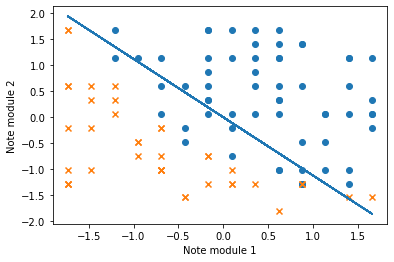

In [15]:
plt.scatter(Xn[np.where(y==1),1],Xn[np.where(y==1),2], label="accepte",marker ='o')
plt.scatter(Xn[np.where(y==0),1],Xn[np.where(y==0),2], label="non accepte",marker ='x')

plt.xlabel('Note module 1')
plt.ylabel('Note module 2')
drawLine(Xn,thetan)

Traçage du coût en fonction de theta0 et theta1

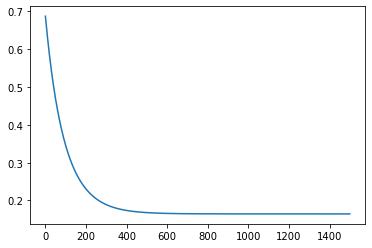

In [16]:
plt.plot(range(iterations), costn)

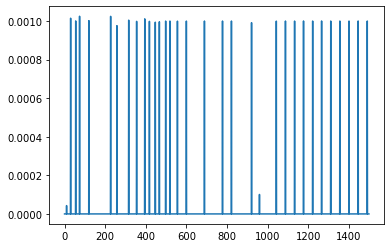

In [17]:
plt.plot(range(iterations), tmp)

Prédire des valeurs de y

In [18]:
# Predire pour des notes note1= 9 et note2=17
#on doit normaliser note1 et note2 

note1 =(9- np.mean(X[:,1]))/np.std(X[:,1])
note2 =(17- np.mean(X[:,2]))/np.std(X[:,2])

ypred= np.matmul([1, note1, note2],thetan);
pred = ['admit'  if (ypred*np.std(y))+np.mean(y) > 0.5 else 'refusé']
pred

['admit']

# Vérification de l'implementation
Comparer vos algorithmes à ceux de scikitlearn

In [19]:
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error

logReg = LogisticRegression()
model= logReg.fit(X,y)
y_pred = model.predict(X)
print(y_pred)
#sklearnCost
sklearn_cost=mean_squared_error(y,y_pred)
print(sklearn_cost)
## notre cout 
final_cos=computeCost(Xn, yn, thetan)
print(final_cos[0])


[0 0 0 1 1 0 1 1 1 1 1 0 1 1 0 1 0 0 1 1 0 1 0 0 1 1 1 1 0 0 1 1 0 0 0 0 1
 1 0 0 1 0 1 1 0 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 0 0 0 0 0 1 0 1 1 0 1 1 1
 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 1 1 1 1 0 1]
0.1
[0.16446141]


# Renforcement d'apprentissage
Mettre ici toute idée qui pourrait renforcer votre apprentissage

In [ ]:
#augementer le nombre d'iteration pour faire travailler l'algo plus longtemps 
#ou bien 
#augementer le learning rate 
#ou 
#fixer la valeur du learning rate une fois le cout se stabilise 

# Consignes

Le travail est à remettre par groupe de 4 au maximum [1..4].

Le délai est le vendredi 25 Mars 2022 à 22h


In [ ]:
# bonne chance